# Logistic regression

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt

import zipfile
import os
import math
import pickle
import requests
import json
import re
import logging
import seaborn

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import time
import datetime
from datetime import datetime, timedelta
from datetime import date
from dateutil import relativedelta

from io import StringIO

%matplotlib inline 
from subprocess import check_output
from IPython.display import display
from colorama import Fore, Back, Style
from scipy.stats import pearsonr

from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.utils import shuffle
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler 
from sklearn import datasets

import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras import optimizers
from keras import losses

import warnings

C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
data = pd.read_csv('preprocessed_data.csv')

In [3]:
data

,Route,Min Gap,Vehicle,Delay,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour
0,505,8,4018,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2014,1,2,6
1,504,22,4128,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2014,1,2,12
2,501,19,4016,1,0,0,0,1,0,0,...,0,0,0,1,0,0,2014,1,2,14
3,504,11,4175,1,0,0,0,1,0,0,...,0,0,0,1,0,0,2014,1,2,14
4,504,6,4080,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2014,1,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45039,505,16,4164,1,1,0,0,0,0,0,...,0,0,1,0,0,0,2017,12,31,9
45040,501,24,4110,1,0,0,0,1,0,0,...,0,0,1,0,0,0,2017,12,31,11
45041,501,24,1419,1,0,0,0,1,0,0,...,0,0,1,0,0,0,2017,12,31,11
45042,510,10,4447,1,0,0,1,0,0,0,...,0,0,1,0,0,0,2017,12,31,11


In [4]:
feature_names = data.columns

for col in feature_names:
     print(col)

Route
Min Gap
Vehicle
Delay
Direction_e
Direction_n
Direction_s
Direction_w
Incident_Diversion
Incident_Emergency Services
Incident_General Delay
Incident_Held By
Incident_Investigation
Incident_Late Leaving Garage
Incident_Mechanical
Incident_Overhead - Pantograph
Incident_Utilized Off Route
Day_Friday
Day_Monday
Day_Saturday
Day_Sunday
Day_Thursday
Day_Tuesday
Day_Wednesday
Year
Month
Day
Hour


In [5]:
corrcoefs = data.corr()['Delay']
corrcoefs

Route                            -0.008716
Min Gap                           0.056566
Vehicle                           0.001145
Delay                             1.000000
Direction_e                       0.011842
Direction_n                      -0.023678
Direction_s                      -0.020946
Direction_w                       0.012471
Incident_Diversion               -0.023048
Incident_Emergency Services       0.001560
Incident_General Delay           -0.060980
Incident_Held By                  0.030531
Incident_Investigation           -0.014389
Incident_Late Leaving Garage      0.017236
Incident_Mechanical               0.014905
Incident_Overhead - Pantograph    0.001530
Incident_Utilized Off Route      -0.023245
Day_Friday                       -0.008207
Day_Monday                        0.005826
Day_Saturday                      0.000255
Day_Sunday                       -0.000565
Day_Thursday                     -0.005024
Day_Tuesday                      -0.000402
Day_Wednesd

In [6]:
# corrcoefs_for_barh = ( (corrcoefs.drop('Delay')) * 1000000 ).astype(int)
corrcoefs_for_barh = corrcoefs.drop('Delay')
corrcoefs_for_barh


Route                            -0.008716
Min Gap                           0.056566
Vehicle                           0.001145
Direction_e                       0.011842
Direction_n                      -0.023678
Direction_s                      -0.020946
Direction_w                       0.012471
Incident_Diversion               -0.023048
Incident_Emergency Services       0.001560
Incident_General Delay           -0.060980
Incident_Held By                  0.030531
Incident_Investigation           -0.014389
Incident_Late Leaving Garage      0.017236
Incident_Mechanical               0.014905
Incident_Overhead - Pantograph    0.001530
Incident_Utilized Off Route      -0.023245
Day_Friday                       -0.008207
Day_Monday                        0.005826
Day_Saturday                      0.000255
Day_Sunday                       -0.000565
Day_Thursday                     -0.005024
Day_Tuesday                      -0.000402
Day_Wednesday                     0.008324
Year       

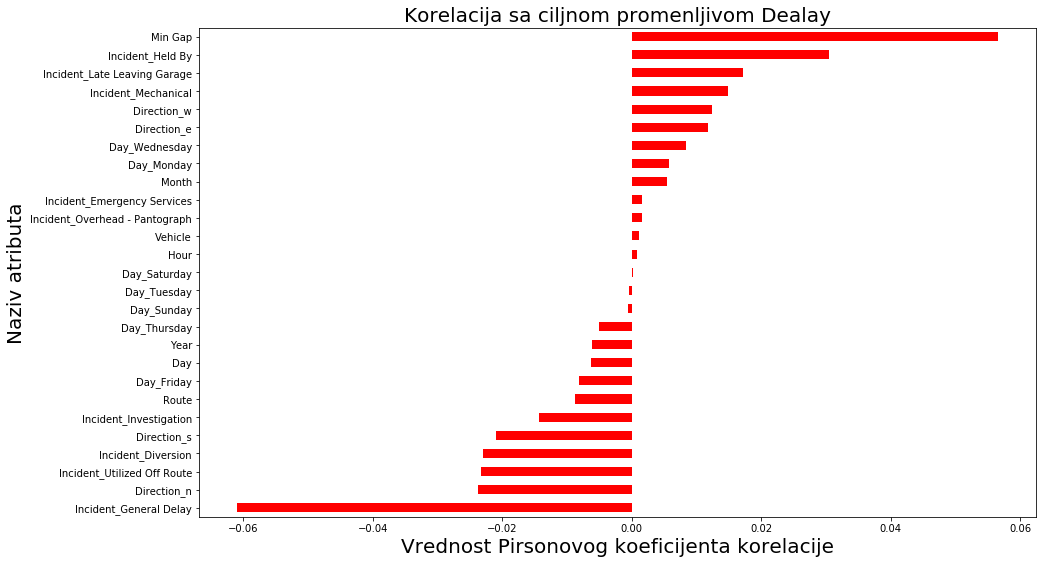

In [7]:
plt.figure(figsize=(15, 9))

corrcoefs_for_plot = pd.Series(corrcoefs_for_barh)
corrcoefs_for_plot.sort_values(inplace=True)

corrcoefs_for_plot.plot.barh(color='red')
plt.title('Korelacija sa ciljnom promenljivom Dealay', fontsize = 20)
plt.xlabel('Vrednost Pirsonovog koeficijenta korelacije', fontsize = 20)
plt.ylabel('Naziv atributa', fontsize = 20)
plt.show()

In [8]:
y = data['Delay']
X = data.drop(columns=['Delay'])

In [9]:
X.corr()

,Route,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,Incident_General Delay,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour
Route,1.000000,-0.086860,0.003536,-0.019117,0.064304,0.058385,-0.047580,-0.023700,-0.055631,0.017453,...,0.010611,-0.029604,-0.049578,0.015163,0.009791,0.024823,-0.011980,-0.001899,0.011446,-0.000178
Min Gap,-0.086860,1.000000,-0.020061,-0.018443,-0.031929,-0.017381,0.045133,0.175230,0.048142,0.010307,...,-0.013045,0.015613,0.042096,-0.015156,-0.005897,-0.009730,-0.015375,0.016159,-0.001196,-0.005060
Vehicle,0.003536,-0.020061,1.000000,0.015028,-0.001610,0.000429,-0.014221,-0.002160,0.001392,-0.024807,...,-0.002274,-0.004080,-0.003524,-0.002267,0.008051,0.001761,-0.049402,0.001179,-0.001149,0.000911
Direction_e,-0.019117,-0.018443,0.015028,1.000000,-0.247167,-0.235475,-0.728888,-0.018901,-0.012847,-0.022736,...,-0.004201,-0.007830,-0.005333,0.004471,0.012275,0.000122,-0.008377,-0.030390,-0.010049,0.003917
Direction_n,0.064304,-0.031929,-0.001610,-0.247167,1.000000,-0.084908,-0.262825,-0.001596,-0.012627,-0.015004,...,-0.004585,0.009142,0.001315,0.000321,-0.004783,0.003262,-0.003167,-0.001273,-0.010484,-0.002060
Direction_s,0.058385,-0.017381,0.000429,-0.235475,-0.084908,1.000000,-0.250392,-0.002825,-0.005542,-0.020404,...,0.006021,0.005678,0.006880,-0.007091,-0.009010,-0.002902,-0.005430,0.008200,0.000749,0.002629
Direction_w,-0.047580,0.045133,-0.014221,-0.728888,-0.262825,-0.250392,1.000000,0.021100,0.022643,0.041636,...,0.003501,-0.000309,0.000905,-0.000843,-0.004734,-0.000384,0.012928,0.026452,0.015350,-0.004136
Incident_Diversion,-0.023700,0.175230,-0.002160,-0.018901,-0.001596,-0.002825,0.021100,1.000000,-0.020563,-0.022316,...,-0.005460,0.002509,0.026506,-0.002049,-0.000388,-0.006262,0.009340,0.011782,-0.000767,0.001514
Incident_Emergency Services,-0.055631,0.048142,0.001392,-0.012847,-0.012627,-0.005542,0.022643,-0.020563,1.000000,-0.032508,...,-0.008074,0.017137,0.026137,-0.005801,-0.007367,-0.006865,0.018482,-0.000305,-0.007546,-0.008458
Incident_General Delay,0.017453,0.010307,-0.024807,-0.022736,-0.015004,-0.020404,0.041636,-0.022316,-0.032508,1.000000,...,-0.020637,0.010302,0.018267,0.003729,-0.014024,-0.001173,0.038061,0.021885,0.013049,-0.000141


In [10]:
number_of_features = X.shape[1]

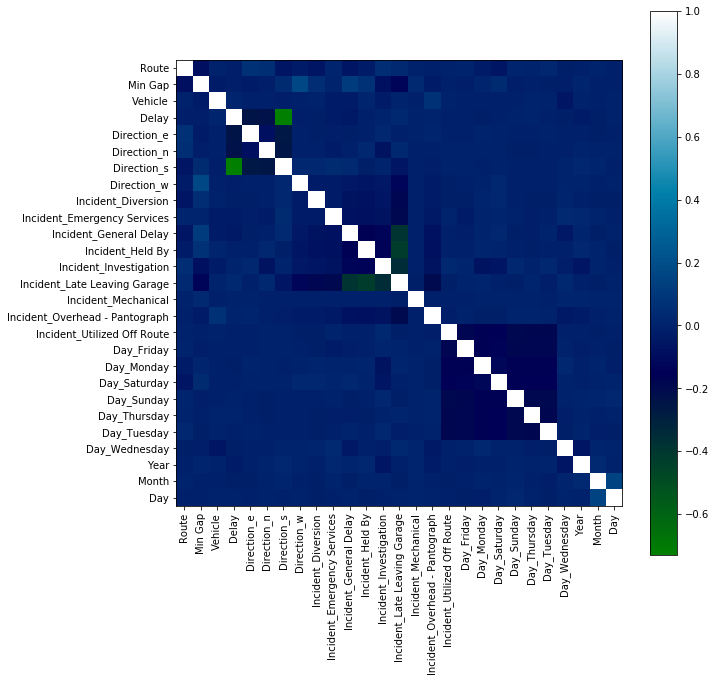

In [11]:
plt.figure(figsize = (10, 10))
plt.xticks(range(0, number_of_features), feature_names, rotation='vertical')
plt.yticks(range(0, number_of_features), feature_names)
plt.imshow(X.corr(), cmap='ocean')
plt.colorbar()
plt.show()

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33, random_state = 7, stratify = y)

In [13]:
X_train

,Route,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,Incident_General Delay,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour
40978,506,12,4169,1,0,0,0,0,0,0,...,0,0,0,1,0,0,2017,7,27,17
29934,501,10,4221,0,0,0,1,0,0,0,...,0,0,0,0,0,1,2016,9,21,22
12501,504,8,4038,1,0,0,0,0,0,0,...,0,0,0,0,1,0,2015,2,24,6
7718,504,8,4153,1,0,0,0,0,0,0,...,0,0,0,1,0,0,2014,10,2,10
41369,506,1,4035,0,0,0,1,0,0,0,...,0,0,0,1,0,0,2017,8,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27651,501,29,4205,1,0,0,0,0,0,0,...,0,0,0,0,1,0,2016,7,5,8
43907,501,10,4232,0,0,0,1,0,0,0,...,0,0,0,0,0,1,2017,12,6,14
26054,512,74,4183,0,0,0,1,0,0,0,...,0,1,0,0,0,0,2016,5,14,8
31049,503,24,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,2016,10,26,8


In [14]:
X_train.shape

(30179, 27)

In [15]:
X_test.shape

(14865, 27)

In [16]:
 y_train.shape
    

(30179,)

In [17]:
y_test.shape

(14865,)

In [18]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
wd_train = np.sum(y_train == 0)
d_train = np.sum(y_train == 1)
print('Train Delay: ', d_train, '     Train Without Delay: ', wd_train)

Train Delay:  29731      Train Without Delay:  448


In [20]:
y_train.value_counts()

1    29731
0      448
Name: Delay, dtype: int64

In [21]:
wd_test = np.sum(y_test == 0)
d_test = np.sum(y_test == 1)
print('Test Delay: ', d_test, '     Test Without Delay: ', wd_test)

Test Delay:  14645      Test Without Delay:  220


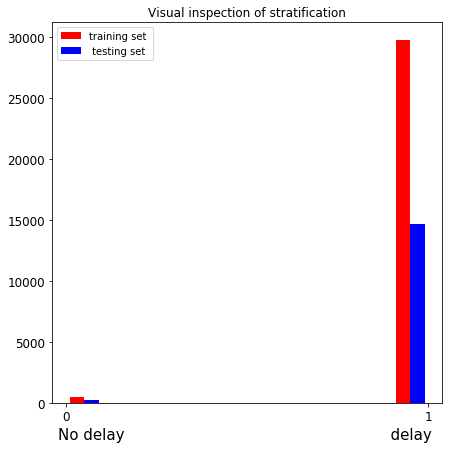

In [22]:
plt.figure(figsize = (7, 7))
matplotlib.rc('xtick', labelsize = 12) 
matplotlib.rc('ytick', labelsize = 12) 
plt.title("Visual inspection of stratification")
plt.xticks([0,1])
plt.xlabel('No delay                                                        delay ', fontsize = 15 )
plt.hist([y_train, y_test], color=['red', 'blue'], label=['training set ',' testing set'])
plt.legend(loc='best')
plt.show()

## Model learning

### It is always good to be able to fine-tune hyperparameters so that the algorithm works best for the type of data I  have. GridSearchCV is a function that is in sklearn’s model_selection package. It allows you to specify the different values for each hyperparameter and try out all the possible combinations when fitting model. It does the training and testing using cross validation of dataset — hence the acronym “CV” in GridSearchCV. The end result of GridSearchCV is a set of hyperparameters that best fit data according to the scoring metric that model to optimize on.

In [23]:
# penalty — Specify the norm of the penalty. l1 is lasso and l2 is ridge
# C — Inverse of regularization strength; smaller values specify stronger regularization.
# solver — Algorithm to use in the optimization problem.
# max_iter — Maximum number of iterations taken for the solvers to converge.

In [24]:
warnings.filterwarnings('ignore')

In [25]:
# parameter grid
parameters = {
     'C'       : np.logspace(-3,3,7),
     'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
}

In [26]:
logistic_regression = linear_model.LogisticRegression()
model = GridSearchCV( logistic_regression,       # model
                      param_grid = parameters,   # hyperparameters
                      scoring = 'accuracy',        # metric for scoring
                      cv = 10                      # number of folds
                    )                    

In [27]:
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [28]:
print("Best parameters) ",model.best_params_)
print("Accuracy :", model.best_score_)

Best parameters)  {'C': 10.0, 'solver': 'newton-cg'}
Accuracy : 0.9868782928526458


### I will now use values of the hyperparameters returned by the GridSearchCV() function to build Logistic Regesion model using the training dataset

In [29]:
model = linear_model.LogisticRegression( C = 10.0, 
                                         penalty = 'l2', 
                                         solver = 'newton-cg'
                                       )
model.fit(X_train, y_train)
# Solvers lbfgs and newton-cg supports only 'l2' or 'none' penalties.

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
model.intercept_

array([9.50781349])

In [31]:
model.coef_

array([[ 3.22168854e-02,  1.46431120e+01,  6.13282980e-02,
        -1.35491285e-02,  6.73940131e-02, -1.79489898e-02,
        -1.46199383e-02, -3.88030097e-02, -1.22266312e-02,
        -2.60893057e-01,  1.76617455e-01, -1.80137254e-01,
         2.45123263e-01,  2.06812302e-02,  5.38691767e-02,
        -1.49883902e-01, -5.08544123e-02,  4.71087617e-02,
        -3.22697062e-02, -2.31146162e-02, -4.78931402e-02,
         5.63993586e-02,  4.44474849e-02, -1.05426787e-01,
         3.77565361e-02, -5.83130032e-02, -3.39119059e-02]])

## Evaluation

In [32]:
y_test_predicted = model.predict(X_test)

In [33]:
model_score = model.score(             X_test, y_test           )
accuracy    = metrics.accuracy_score(  y_test, y_test_predicted )
precision   = metrics.precision_score( y_test, y_test_predicted )
recall      = metrics.recall_score(    y_test, y_test_predicted )
f1          = metrics.f1_score(        y_test, y_test_predicted )
auc         = metrics.roc_auc_score(   y_test, y_test_predicted )

In [34]:
print("Model Score :  " , model_score )
print("Accuracy :     " , accuracy )
print("Precision :    " , precision )
print("Recall :       " , recall )
print("Precision :    " , f1 )
print("AUC :          " , auc )

Model Score :   0.9864783047426842
Accuracy :      0.9864783047426842
Precision :     0.9871829465731247
Recall :        0.999248890406282
Precision :     0.9931792731344802
AUC :           0.5678062633849591


In [35]:
# metrics.plot_roc_curve(logistic_regression, X_test, y_test)

In [36]:
y_train_predicted = model.predict(X_train)

In [37]:
y_train_predicted[:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [38]:
train_score = metrics.accuracy_score(y_train, y_train_predicted)
test_score = metrics.accuracy_score(y_test, y_test_predicted)

In [39]:
print("Accuracy at the training set: {train}\nAccuracy at the test set: {test}".format(train=train_score, test=test_score))

Accuracy at the training set: 0.9870439709731933
Accuracy at the test set: 0.9864783047426842


In [40]:
print(metrics.classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.73      0.14      0.23       220
           1       0.99      1.00      0.99     14645

    accuracy                           0.99     14865
   macro avg       0.86      0.57      0.61     14865
weighted avg       0.98      0.99      0.98     14865



In [41]:
metrics.confusion_matrix(y_test, y_test_predicted)

array([[   30,   190],
       [   11, 14634]], dtype=int64)

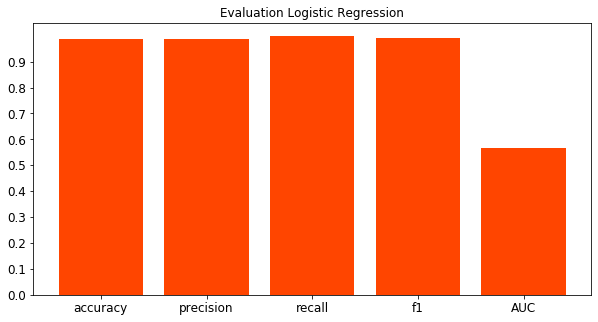

In [42]:
fig = plt.figure(figsize=(10, 5))
plt.bar(['accuracy', 'precision', 'recall', 'f1', 'AUC'], [accuracy , precision, recall, f1, auc], color='orangered')
plt.title("Evaluation Logistic Regression")
plt.yticks(np.arange(0, 1, 0.1)) 
plt.show()

# Neural networks

In [43]:
np.random.seed(7)

## Creating Neural networks

I will create a neural network with advance propagation. <br> The neural network will have an input layer, three hidden layers with, respectively, 100, 40 and 20 neurons, and an output layer. <br> The number of input layer neurons corresponds to the number of attributes of the data set, which is 27. <br> The number of output layer neurons is 1 since it is a binary classification. <br> In hidden layers I will use relu activation function and in the latter sigmoid function. <br> Optimizer Adam will be used. <br> Binary cross entropy as a function of error will be used. <br> Since the task of classification metrics will be accuracy. <br> I will use Dropout regularization for reducing overfitting and improving the generalization. 

In [44]:
number_of_features = X_train.shape[1]
output_size = 1

In [45]:
number_of_features

27

In [46]:
model_FNN = Sequential()
model_FNN.add(Dense(units = 100, input_dim = number_of_features, activation = 'relu'))
model_FNN.add(Dense(units = 40, activation = 'relu'))
model_FNN.add(Dense(units = 20, activation = 'relu'))
model_FNN.add(Dropout(0.1))
model_FNN.add(Dense(units = output_size, activation = 'sigmoid'))

In [47]:
model_FNN.compile( optimizers.Adam(learning_rate = 0.0001), loss = losses.BinaryCrossentropy(), metrics = ['accuracy'] )

In [48]:
model_FNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2800      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                4040      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________


In [49]:
history = model_FNN.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose = 0, validation_split = 0.2)

In [50]:
epochs = history.epoch

loss = history.history['loss']
validation_loss = history.history['val_loss']

acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

In [51]:
print("Loss                = " , loss[49] )
print("Accuracy            = " ,  acc[49])

print("Validation Loss     = " , validation_loss[49] )
print("Validation Accuracy = " ,  validation_acc[49])

Loss                =  0.019805697724223137
Accuracy            =  0.9946154356002808
Validation Loss     =  0.03719339147210121
Validation Accuracy =  0.988734245300293


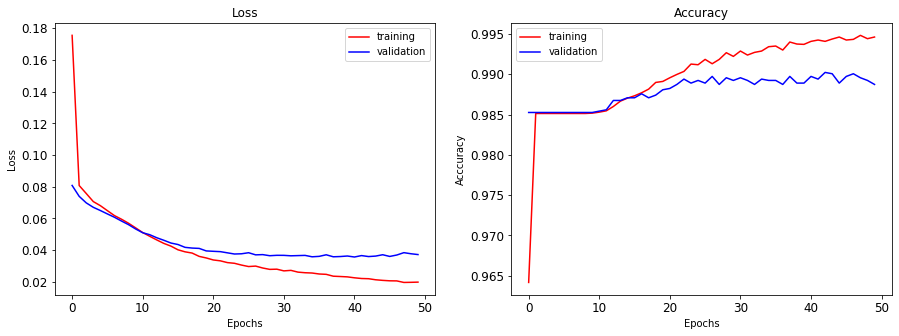

In [52]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='blue', label='validation')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acccuracy')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='blue', label='validation')
plt.legend(loc='best')

## Neural network evaluation

In [53]:
final_model_FNN = Sequential()
final_model_FNN.add(Dense(units=100, input_dim=number_of_features, activation='relu'))
final_model_FNN.add(Dense(units=40, activation='relu'))
final_model_FNN.add(Dense(units=20, activation='relu'))
final_model_FNN.add(Dropout(0.1))
final_model_FNN.add(Dense(units=output_size, activation='sigmoid'))
final_model_FNN.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [54]:
history = final_model_FNN.fit(X_train, y_train, epochs=50, batch_size=32, verbose = 0)

In [55]:
test_loss, test_accuracy = final_model_FNN.evaluate(X_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_accuracy))

465/465 [==============================] - 1s 3ms/step - loss: 0.0386 - accuracy: 0.9876
Test loss: 0.03858280926942825, test accuracy: 0.9876219034194946


In [56]:
train_loss, train_accuracy = final_model_FNN.evaluate(X_train, y_train)
print ("Train loss: {}, train accuracy: {}".format(train_loss, train_accuracy))

944/944 [==============================] - 2s 3ms/step - loss: 0.0152 - accuracy: 0.9965
Train loss: 0.01523535419255495, train accuracy: 0.9965207576751709


In [57]:
epochs = history.epoch
loss = history.history['loss']
acc = history.history['accuracy']

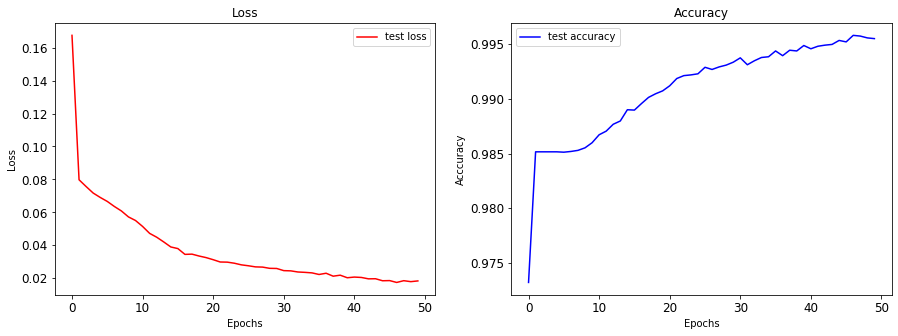

In [58]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, c='red', label='test loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acccuracy')
plt.plot(epochs, acc, c='blue', label = 'test accuracy')
plt.legend(loc='best')

### Oversampling 
Since the data is not balanced I will do Oversampling

In [59]:
wd = np.sum(y == 0)
d = np.sum(y == 1)
print('With Delay: ', d , '     Without Delay: ', wd)

With Delay:  44376      Without Delay:  668


In [60]:
y.value_counts()

1    44376
0      668
Name: Delay, dtype: int64

In [61]:
X

,Route,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,Incident_General Delay,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour
0,505,8,4018,1,0,0,0,0,0,0,...,0,0,0,1,0,0,2014,1,2,6
1,504,22,4128,1,0,0,0,0,0,0,...,0,0,0,1,0,0,2014,1,2,12
2,501,19,4016,0,0,0,1,0,0,0,...,0,0,0,1,0,0,2014,1,2,14
3,504,11,4175,0,0,0,1,0,0,0,...,0,0,0,1,0,0,2014,1,2,14
4,504,6,4080,1,0,0,0,0,0,0,...,0,0,0,1,0,0,2014,1,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45039,505,16,4164,1,0,0,0,0,0,0,...,0,0,1,0,0,0,2017,12,31,9
45040,501,24,4110,0,0,0,1,0,0,0,...,0,0,1,0,0,0,2017,12,31,11
45041,501,24,1419,0,0,0,1,0,0,0,...,0,0,1,0,0,0,2017,12,31,11
45042,510,10,4447,0,0,1,0,0,0,0,...,0,0,1,0,0,0,2017,12,31,11


In [62]:
ros = SMOTE(k_neighbors=5, sampling_strategy=1/2, random_state=7)
# ros = SMOTE()
X_resampled, y_resampled = ros.fit_resample(X, y)

In [63]:
np.bincount(y_resampled)

array([22188, 44376], dtype=int64)

In [64]:
wd_resempled = np.sum(y_resampled == 0)
d_resempled = np.sum(y_resampled == 1)
print('With Delay: ', d_resempled, '     Without Delay: ', wd_resempled)

With Delay:  44376      Without Delay:  22188


<BarContainer object of 2 artists>

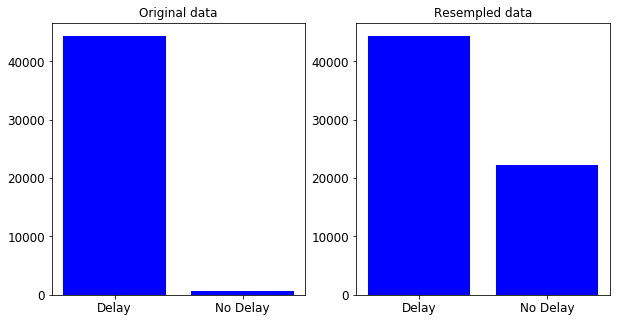

In [65]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original data')
plt.bar(['Delay', 'No Delay'], [d, wd], color='blue')

plt.subplot(1, 2, 2)
plt.title('Resempled data')
plt.bar(['Delay', 'No Delay'], [d_resempled, wd_resempled], color='blue')


# Logistic regression

In [66]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = model_selection.train_test_split(X_resampled, y_resampled, test_size = 0.33, random_state = 7, stratify = y_resampled)

In [67]:
X_train_resampled.shape

(44597, 27)

In [68]:
X_test_resampled.shape

(21967, 27)

In [69]:
y_train_resampled.shape
    

(44597,)

In [70]:
y_test_resampled.shape

(21967,)

In [71]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_resampled)
X_train_resampled = scaler.transform(X_train_resampled)
X_test_resampled = scaler.transform(X_test_resampled)

In [72]:
wd_train_resampled = np.sum(y_train_resampled == 0)
d_train_resampled = np.sum(y_train_resampled == 1)
print('Train Delay: ', d_train_resampled, '     Train Without Delay: ', wd_train_resampled)

Train Delay:  29731      Train Without Delay:  14866


In [73]:
wd_test_resampled = np.sum(y_test_resampled == 0)
d_test_resampled = np.sum(y_test_resampled == 1)
print('Test Delay: ', d_test_resampled, '     Test Without Delay: ', wd_test_resampled)

Test Delay:  14645      Test Without Delay:  7322


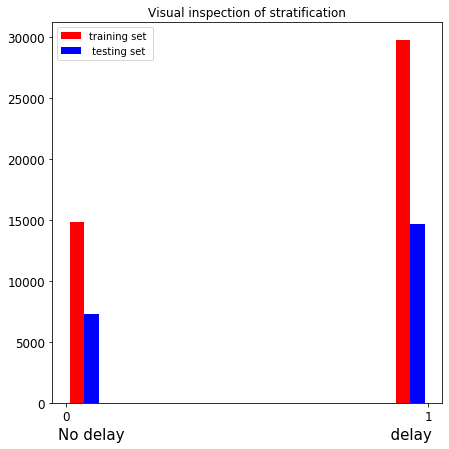

In [74]:
plt.figure(figsize = (7, 7))
matplotlib.rc('xtick', labelsize = 12) 
matplotlib.rc('ytick', labelsize = 12) 
plt.title("Visual inspection of stratification")
plt.xticks([0,1])
plt.xlabel('No delay                                                        delay ', fontsize = 15 )
plt.hist([y_train_resampled, y_test_resampled], color=['red', 'blue'], label=['training set ',' testing set'])
plt.legend(loc='best')
plt.show()

## Model learning

In [75]:
# parameter grid
parameters = { 'C'       : np.logspace(-3,3,7),
               'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
             }

In [76]:
logistic_regression = linear_model.LogisticRegression()

model_LR_resampled  = GridSearchCV( logistic_regression,       # model
                                    param_grid = parameters,   # hyperparameters
                                    scoring = 'accuracy',        # metric for scoring
                                    cv = 10                      # number of folds
                                  )

In [77]:
model_LR_resampled.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [78]:
print("Best parameters) " , model_LR_resampled.best_params_)
print("Accuracy :" ,        model_LR_resampled.best_score_)

Best parameters)  {'C': 1000.0, 'solver': 'lbfgs'}
Accuracy : 0.9894163284525865


### I will now use values of the hyperparameters returned by the GridSearchCV() function to build Logistic Regesion model using the training resampled dataset

In [79]:
model_LR_resampled = linear_model.LogisticRegression( C = 1000.0, 
                                                      solver = 'liblinear'
                                                    )

In [80]:
model_LR_resampled.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
model_LR_resampled.intercept_

array([-31.85863776])

In [82]:
model_LR_resampled.coef_

array([[-1.66372087e-01,  1.67142214e+01,  2.49434971e-01,
         1.09580247e+01,  5.69209789e+00,  5.58272621e+00,
         1.10057599e+01,  1.08969782e+01,  1.59629875e+01,
         2.07986023e+01,  3.18183399e+01,  3.55937425e+01,
         2.99389741e+01,  5.66637525e+01,  1.33886717e+00,
         1.94606416e+01,  1.48516299e+01,  1.42847174e+01,
         1.24624178e+01,  1.17769051e+01,  1.51649626e+01,
         1.45055304e+01,  1.44838724e+01, -4.96665577e-02,
         1.31614355e-01, -7.41514752e-02,  4.46773363e-02]])

## Evaluation

In [83]:
y_test_predicted = model_LR_resampled.predict(X_test_resampled)

In [84]:
accuracy  = metrics.accuracy_score(  y_test_resampled, y_test_predicted )
precision = metrics.precision_score( y_test_resampled, y_test_predicted )
recall    = metrics.recall_score(    y_test_resampled, y_test_predicted )
f1        = metrics.f1_score(        y_test_resampled, y_test_predicted )
auc       = metrics.roc_auc_score(   y_test_resampled, y_test_predicted  )

In [85]:
print("Accuracy  = " ,  accuracy)
print("Precision = " , precision )
print("Recall    = " , recall )
print("F1        = " , f1 )
print("AUC       = " , auc )

Accuracy  =  0.9894842263395093
Precision =  0.989140762861409
Recall    =  0.995151928986002
F1        =  0.9921372408863475
AUC       =  0.9866499879838506


In [86]:
y_train_predicted = model_LR_resampled.predict(X_train_resampled)

In [87]:
y_train_predicted[:30]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [88]:
train_score = metrics.accuracy_score(y_train_resampled, y_train_predicted)
test_score  = metrics.accuracy_score(y_test_resampled,  y_test_predicted)

In [89]:
print("Accuracy at the training set: {train}\nAccuracy at the test set:     {test}".format(train=train_score, test=test_score))

Accuracy at the training set: 0.9899544812431329
Accuracy at the test set:     0.9894842263395093


In [90]:
print(metrics.classification_report(y_test_resampled, y_test_predicted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7322
           1       0.99      1.00      0.99     14645

    accuracy                           0.99     21967
   macro avg       0.99      0.99      0.99     21967
weighted avg       0.99      0.99      0.99     21967



In [91]:
metrics.confusion_matrix(y_test_resampled, y_test_predicted)

array([[ 7162,   160],
       [   71, 14574]], dtype=int64)

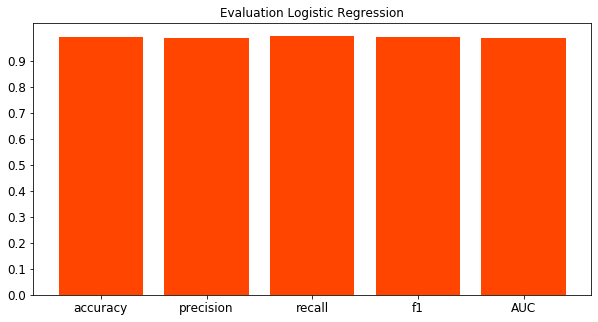

In [92]:
fig = plt.figure(figsize=(10, 5))
plt.bar(['accuracy', 'precision', 'recall', 'f1', 'AUC'], [accuracy , precision, recall, f1, auc], color='orangered')
plt.title("Evaluation Logistic Regression")
plt.yticks(np.arange(0, 1, 0.1)) 
plt.show()

# Fully Connected Neural Networks 

## Creating Fully Connected Neural Networks

I will create a neural network with advance propagation. <br> The neural network will have an input layer, three hidden layers with, respectively, 100, 40 and 20 neurons, and an output layer. <br> The number of input layer neurons corresponds to the number of attributes of the data set, which is 27. <br> The number of output layer neurons is 1 since it is a binary classification. <br> In hidden layers I will use relu activation function and in the latter sigmoid function. <br> Optimizer Adam will be used. <br> Binary cross entropy as a function of error will be used. <br> Since the task of classification metrics will be accuracy. <br> I will use Dropout regularization for reducing overfitting and improving the generalization. 

In [93]:
np.random.seed(7)

In [94]:
number_of_features = X_train.shape[1]
output_size = 1

In [95]:
number_of_features

27

In [96]:
model = Sequential()
model.add(Dense(units = 100, input_dim = number_of_features, activation = 'relu'))
model.add(Dense(units = 40, activation = 'relu'))
model.add(Dense(units = 20, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = output_size, activation = 'sigmoid'))

In [97]:
model.compile( optimizers.Adam(learning_rate = 0.0001), loss = losses.BinaryCrossentropy(), metrics = ['accuracy'] )

In [98]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               2800      
_________________________________________________________________
dense_9 (Dense)              (None, 40)                4040      
_________________________________________________________________
dense_10 (Dense)             (None, 20)                820       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 21        
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________


In [99]:
history = model.fit(X_train_resampled, y_train_resampled, epochs = 50, batch_size = 32, verbose = 0, validation_split = 0.2)

In [100]:
epochs = history.epoch

loss = history.history['loss']
validation_loss = history.history['val_loss']

acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

In [101]:
print("Loss                = " , loss[49] )
print("Accuracy            = " ,  acc[49])

print("Validation Loss     = " , validation_loss[49] )
print("Validation Accuracy = " ,  validation_acc[49])

Loss                =  0.011882875114679337
Accuracy            =  0.9970008730888367
Validation Loss     =  0.02996302768588066
Validation Accuracy =  0.9914798140525818


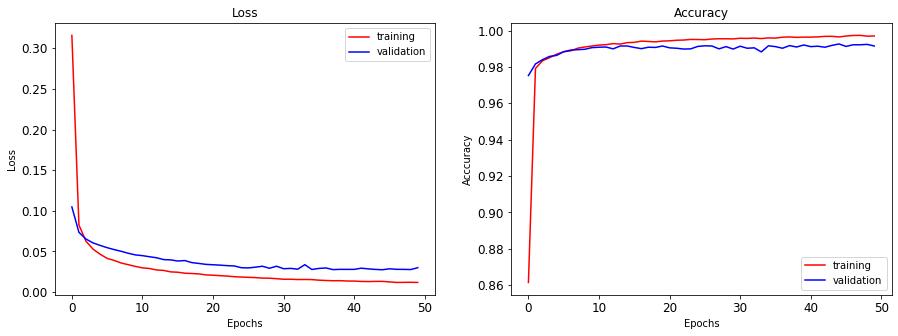

In [102]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='blue', label='validation')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acccuracy')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='blue', label='validation')
plt.legend(loc='best')

## Fully Connected Neural Networks Evaluation

In [103]:
final_model = Sequential()
final_model.add(Dense(units=100, input_dim=number_of_features, activation='relu'))
final_model.add(Dense(units=40, activation='relu'))
final_model.add(Dense(units=20, activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(units=output_size, activation='sigmoid'))
final_model.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [104]:
history = final_model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, verbose = 0)

In [105]:
test_loss, test_accuracy = final_model.evaluate(X_test_resampled, y_test_resampled)
print ("Test loss:     {}, \nTest accuracy: {}".format(test_loss, test_accuracy))

687/687 [==============================] - 2s 2ms/step - loss: 0.0276 - accuracy: 0.9917
Test loss:     0.027594253420829773, 
Test accuracy: 0.9917148351669312


In [106]:
train_loss, train_accuracy = final_model.evaluate(X_train_resampled, y_train_resampled)
print ("Train loss:     {}, \nTrain accuracy: {}".format(train_loss, train_accuracy))

1394/1394 [==============================] - 3s 2ms/step - loss: 0.0095 - accuracy: 0.9978
Train loss:     0.0095335328951478, 
Train accuracy: 0.9978249669075012


In [107]:
epochs = history.epoch
loss = history.history['loss']
acc = history.history['accuracy']

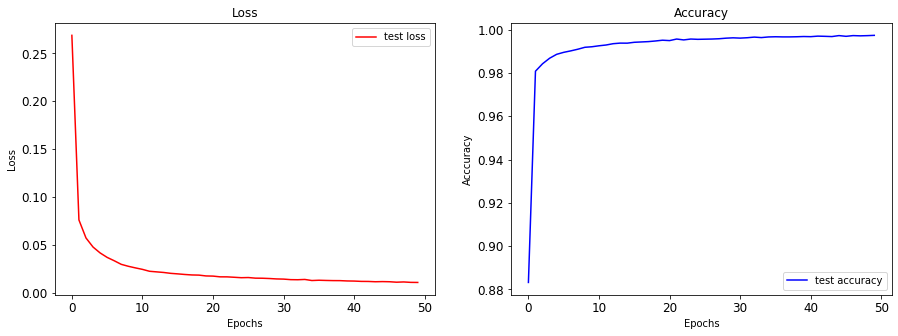

In [108]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, c='red', label='test loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acccuracy')
plt.plot(epochs, acc , c='blue', label = 'test accuracy')
plt.legend(loc='best')

## Save model

In [109]:
from keras.models import load_model

In [110]:
model.save('final_model.h5') 